<div style="text-align: right">

### DATA 22100 - Introduction to Machine Learning

</div>

<img src="https://github.com/david-biron/DATA221imgs/blob/main/UChicago_DSI.png?raw=true" align="right" alt="UC-DSI" width="300">


<center>

# Brief Introduction to PyTorch

(install a version compatible with your hardware)

</center>


In [1]:
!pip3 install torchvision # ==0.14.1
!pip3 install torch # ==1.13.1 

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 5.1 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 150.8/150.8 MB 3.7 MB/s eta 0:00:0000:0100:01


In [3]:
import numpy as np
import pandas as pd
import torch
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')


### Brief intro to pytorch tensors

At first glance, tensor look like numpy arrays:

- $0d$ (scalar), $1d$, $2d$, ...
- All elements must be of the **same data type**.
- Can be initialized in [all sorts of ways](https://pytorch.org/docs/stable/tensors.html).
- By default, created on the CPU (but can be moved to a GPU).


In [4]:
tensor_1d = torch.rand(4)
print(tensor_1d)
print('    Shape: ', tensor_1d.shape)
print('     Type: ', tensor_1d.dtype)
## the type does matter in certain instances 
print() 

tensor_2d = torch.zeros(2,2, dtype=torch.int32)
print(tensor_2d)
print('    Shape: ', tensor_2d.shape)
print('     Type: ', tensor_2d.dtype)



tensor([0.8023, 0.5595, 0.2219, 0.6033])
    Shape:  torch.Size([4])
     Type:  torch.float32

tensor([[0, 0],
        [0, 0]], dtype=torch.int32)
    Shape:  torch.Size([2, 2])
     Type:  torch.int32


- Slicing works similar to arrays

#### Note:

A $0d$ (or any other) slice of a tensor is still a tensor.

To get the element as a, say, float use `.item()`


In [5]:
t1 = torch.rand(2,2)
t2 = torch.eye(2) # identity tensor 

print('First column of t1: ', t1[:,0])
print('Second row of t1: ', t1[1,:], '\n\n')

print(t1[0,0] , t1[0,0].item()) ## need to use item 

# BTW, this can be a bit confusing: 
print(t1[0,0] == t1[0,0].item()) # checks if the values are equal
print(t1[0,0] is t1[0,0].item()) # checks if the two point to the
                                 # same object! 
    

First column of t1:  tensor([0.7210, 0.5880])
Second row of t1:  tensor([0.5880, 0.1396]) 


tensor(0.7210) 0.7209712862968445
tensor(True)
False


#### Tensors can be converted to numpy arrays.


In [5]:
torch.eye(3).numpy()

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]], dtype=float32)

- If the tensor is on the CPU, the array converted from the tensor will **share memory**
- But they are not the same object - the tensor object is larger, has different functionality, and can store information that the array does not have).


In [6]:
t2 = torch.eye(2) # identity tensor 

ndarray = t2.numpy()
print('A numpy array converted from a tensor:')
print(ndarray, type(ndarray), '\n')

######################################################
# Careful!                                           #
# If the tensor is on the CPU (rather than GPU)      #
# the two objects share the same memory location:    #
######################################################

print('Changing the first element of the tensor...')
t2[0,0] = 7
print('... changes the numpy array:')
print(t2, '\n', ndarray, '\n')

print('Changing the last element of the numpy array...')
ndarray[1,1] = 3
print('... changes the tensor:')
print(t2, '\n', ndarray, '\n')

print('But are they teh same object?')
t2 is ndarray # but are not the same object...


A numpy array converted from a tensor:
[[1. 0.]
 [0. 1.]] <class 'numpy.ndarray'> 

Changing the first element of the tensor...
... changes the numpy array:
tensor([[7., 0.],
        [0., 1.]]) 
 [[7. 0.]
 [0. 1.]] 

Changing the last element of the numpy array...
... changes the tensor:
tensor([[7., 0.],
        [0., 3.]]) 
 [[7. 0.]
 [0. 3.]] 

But are they teh same object?


False

#### A tensor can keep track of the gradient from optimization steps

`requires_grad=True` will create a tensor where gradients are calculated when it is operated on (for optimization purposes) and stored as a [computational graph](https://pytorch.org/blog/computational-graphs-constructed-in-pytorch/) alongside with the tensor values.

This is used for tensors that store **model parameters that need to be optimzed**.

For a tensor with gradients to be **converted** to a numpy array it needs to be `detach`ed from the gradients first.


In [8]:
parameters_w_grad = torch.rand(3,3, requires_grad=True)
print(parameters_w_grad)

print(parameters_w_grad.detach().numpy())


tensor([[0.9059, 0.0127, 0.1932],
        [0.8983, 0.4759, 0.5400],
        [0.7409, 0.4830, 0.2763]], requires_grad=True)
[[0.9058727  0.01269013 0.19324708]
 [0.89833593 0.47587883 0.5399539 ]
 [0.740917   0.48297215 0.2762832 ]]


In [8]:
print(parameters_w_grad.detach().numpy())



[[0.47305983 0.82296395 0.8861918 ]
 [0.25813723 0.7182535  0.7137081 ]
 [0.14916301 0.45337164 0.81058776]]


#### Like arrays, tensors can be added (element by element) and multiplied (element by element or matmul)


In [9]:
t1 = torch.rand(2,3,4,5)
t1.view(-1, 2).shape
# t2 = torch.rand(5,7)

# t1 @ t2

torch.Size([60, 2])

In [10]:
t1 = torch.rand(2,2)
t2 = torch.eye(2) # identity tensor 

print('Two tensors:')
print(t1, '\n\n', t2, '\n')
print('Addition (element by element):\n', t1+t2, '\n')
print('Multiplication element by element:\n', t1*t2, '\n')
print('Matrix multiplication:\n', t1@t2 )


Two tensors:
tensor([[0.7101, 0.8630],
        [0.6422, 0.4070]]) 

 tensor([[1., 0.],
        [0., 1.]]) 

Addition (element by element):
 tensor([[1.7101, 0.8630],
        [0.6422, 1.4070]]) 

Multiplication element by element:
 tensor([[0.7101, 0.0000],
        [0.0000, 0.4070]]) 

Matrix multiplication:
 tensor([[0.7101, 0.8630],
        [0.6422, 0.4070]])


#### Reshaping tensors with [`view()`](https://pytorch.org/docs/stable/generated/torch.Tensor.view.html)

If it appears, `-1` dimension is inferred from the other dimnensions of the tensor.


In [11]:
t2 = torch.eye(2)+7 # identity tensor 


print('A 2x2 tensor flattened to a 1d row with 4 elements:')
print(t2.view(4),
      t2.view(4).shape, '\n') # four elements in a row

print('A 2x2 tensor reshaped to a 4x1 tensor - #rows inferred:')
print(t2.view(-1,1),
      t2.view(-1,1).shape, '\n') # One column, infer number of rows

print('A 2x2 tensor reshaped to a 1x4 tensor - #columns inferred:')
print(t2.view(1,-1),
      t2.view(1,-1).shape, '\n') # On row, infer number of columns

print('A 2x2 tensor flattened to a 1d row - #columns inferred:')
print(t2.view(-1),
      t2.view(-1).shape, '\n') # inferred number of elements in a row


A 2x2 tensor flattened to a 1d row with 4 elements:
tensor([8., 7., 7., 8.]) torch.Size([4]) 

A 2x2 tensor reshaped to a 4x1 tensor - #rows inferred:
tensor([[8.],
        [7.],
        [7.],
        [8.]]) torch.Size([4, 1]) 

A 2x2 tensor reshaped to a 1x4 tensor - #columns inferred:
tensor([[8., 7., 7., 8.]]) torch.Size([1, 4]) 

A 2x2 tensor flattened to a 1d row - #columns inferred:
tensor([8., 7., 7., 8.]) torch.Size([4]) 



#### Moving tensor to a GPU

On some M1, M2, and M3 Macbooks, the MPS frameworks supports working with GPU.

In that case, device='mps'.


In [10]:
if torch.cuda.is_available(): 
    device = 'cuda'
else: 
    device = 'cpu'
    
print(device) 
    
t1 = torch.rand(2,2)
t1.to(device) # Move to GPU if available   
# OR 
t1 = torch.rand(2,2, device=device) # Create on GPU if available



cpu


### Brief intro to pytorch `autograd`

- Calculating gradients of loss functions using the chain rule is necessary for figuring out the contribution of the parameters to errors.

$\rightarrow$ Optimizing model parameters (typically) requires calculating gradients of loss functions using the chain rule.

- The `autograd` module performs these calculations and makes the results available to the optimizer by constructing a [computational graph](https://pytorch.org/blog/computational-graphs-constructed-in-pytorch/).

- The calculations are performed 'under the hood' - they do not have to be implemented explicitly for every model.

#### Simple example

All operations on the tensor `x` will be tracked on an operational graph.


In [13]:
x = torch.tensor([1/2, 1/2, 1/2, 1/2], requires_grad=True)
print('x:', x) 
print('x.grad: ', x.grad)
print()

print('First forward pass with three operations')
print('    Note that the operations result in a scalar:\n')
f_of_x = x**2
print('f(x) = x**2:', f_of_x) 
print('f(x).grad_fn: ', f_of_x.grad_fn) # 'Pow' stands for 
                                        # power operation
print('x.grad: ', x.grad)
print()

g_of_x = 4*f_of_x
print('g(x) = 4*[f(x)]:', g_of_x) 
print('g(x).grad_fn: ', g_of_x.grad_fn) # 'Mul' stands for 
                                        # multiplication operation
print('x.grad: ', x.grad)
print()

h_of_x = g_of_x @ g_of_x
print('h(x) = g(x).g(x):', h_of_x) 
print(h_of_x.grad_fn) # 'Dot' stands for dot product operation
print('x.grad: ', x.grad)
print()

print('\n Performing the first backward pass')
h_of_x.backward() # By default, the previous computational  
                  # graph is released
print('x.grad = dh/dx: ', x.grad) # These values can inform an 
                                  # optimizer how to adjust x. 
                                  # Of course, typically the gradient
                                  # is calculated for a loss function 
                                  # and not for arbitrary operations. 
print('(the first computational graph was released.)\n\n')

print('Second forward pass with the same three operations:\n')
f_of_x = x**2
print('f(x) = x**2:', f_of_x) 
print('x.grad: ', x.grad)
print()

g_of_x = 4*f_of_x
print('g(x) = 4*[f(x)]:', g_of_x) 
print('x.grad: ', x.grad)
print()

h_of_x = g_of_x @ g_of_x
print('h(x) = g(x).g(x):', h_of_x) 
print('x.grad: ', x.grad)
print()

##################################################
# The .backward() method calculates the gradient #
##################################################

print('\n Performing the second backward pass')
h_of_x.backward() # Calculate the gradient
print('Accumulated x.grad = dh/dx: ', x.grad) # By default, the dh/dx 
                                              # are accumulated!
print('(the second computational graph was released.)\n\n')


x: tensor([0.5000, 0.5000, 0.5000, 0.5000], requires_grad=True)
x.grad:  None

First forward pass with three operations
    Note that the operations result in a scalar:

f(x) = x**2: tensor([0.2500, 0.2500, 0.2500, 0.2500], grad_fn=<PowBackward0>)
f(x).grad_fn:  <PowBackward0 object at 0x14d138af0>
x.grad:  None

g(x) = 4*[f(x)]: tensor([1., 1., 1., 1.], grad_fn=<MulBackward0>)
g(x).grad_fn:  <MulBackward0 object at 0x14d138a90>
x.grad:  None

h(x) = g(x).g(x): tensor(4., grad_fn=<DotBackward0>)
x.grad:  None


 Performing the first backward pass
x.grad = dh/dx:  tensor([8., 8., 8., 8.])
(the first computational graph was released.)


Second forward pass with the same three operations:

f(x) = x**2: tensor([0.2500, 0.2500, 0.2500, 0.2500], grad_fn=<PowBackward0>)
x.grad:  tensor([8., 8., 8., 8.])

g(x) = 4*[f(x)]: tensor([1., 1., 1., 1.], grad_fn=<MulBackward0>)
x.grad:  tensor([8., 8., 8., 8.])

h(x) = g(x).g(x): tensor(4., grad_fn=<DotBackward0>)
x.grad:  tensor([8., 8., 8., 8.])


 

#### Why is all this information computed and stored?

<details><summary><button> $\leftarrow$ Well... </button></summary>

Just in case:

- The tensor in question holds model parameters (**weights**).
- The operations performed on the tensor calculated a **loss function**.

In that case, parameters will need to be gradually improved (**optimized**) and the gradients come in handy (GD).

</details>

<!--      -->

<br>


### Example: linear regression with the Galton dataset

The Galton dataset contains information on $\sim 1000$ individuals that include their hights and their parents' heights.


In [19]:
galton = pd.read_csv('/Users/giovannimaya/Downloads/data/galton.csv')
print('No. of records is: %d'%len(galton))
galton.dropna(inplace=True)
print('No. of records after dropping missing data is: %d'%len(galton))
galton.head()


No. of records is: 934
No. of records after dropping missing data is: 934


,family,father,mother,midparentHeight,children,childNum,gender,childHeight
0,1,78.5,67.0,75.43,4,1,male,73.2
1,1,78.5,67.0,75.43,4,2,female,69.2
2,1,78.5,67.0,75.43,4,3,female,69.0
3,1,78.5,67.0,75.43,4,4,female,69.0
4,2,75.5,66.5,73.66,4,1,male,73.5


#### The linear regression model:

$$\text{ Child_Height } = \beta_1 \times \text{ Mid_Parents_Height }$$

<br>

- On predictor
- One weight/parameter
- No intercept/bias


Before training:
    Linear coef = 0.74
    Parent height=74.00 , predicted child height=55.05


After training:
    Linear coef = nan
    Parent height=74.00 , predicted child height=nan


On average, parents in the dataset were
taller than their children by 2.46"


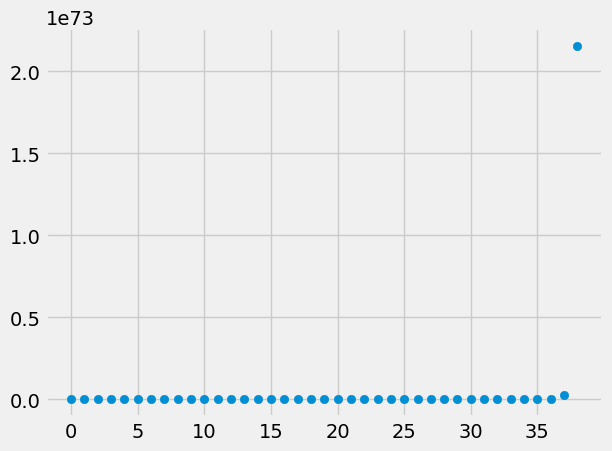

In [23]:
x = torch.tensor([galton.midparentHeight])
y = torch.tensor(galton.childHeight)

w = torch.rand(1, requires_grad=True) # single weight/parameter

def forward(x):
    return w*x # Introducing a bias would require a 'data row' of 1s. 
               # For simplicity, our model will assume 0 bias. 

def MSE(y, y_hat): 
    return ((y-y_hat)**2).mean()

parentsHeightTest = 74.00

y_hat = forward(parentsHeightTest)
print('Before training:')
print('    Linear coef = %.2f'%(w.item()))
print('    Parent height=%.2f , predicted child height=%.2f\n\n'%\
      (parentsHeightTest, y_hat))

#############################################################
learning_rate = 1e-3 # (try 1e-3 to see what might happen...)
n_epochs = 50 
#############################################################

losses = []
for epoch in range(n_epochs):

    y_hat = forward(x)   # forward pass -> current prediction
    loss = MSE(y, y_hat) # calculate loss
    losses.append(loss.item())
    loss.backward()      # backward pass -> calculate gradient
    
    with torch.no_grad():  
        w -= learning_rate * w.grad # update weight using 
                                    # gradient descent
     
    w.grad.zero_() # avoid accumulating these grads into next epoch
    
plt.scatter(range(n_epochs), losses)

y_hat = forward(parentsHeightTest)    
print('After training:')
print('    Linear coef = %.2f'%(w.item()))
print('    Parent height=%.2f , predicted child height=%.2f\n\n'%\
      (parentsHeightTest, y_hat))

deltaHeight = (galton.midparentHeight - galton.childHeight).mean()
print('On average, parents in the dataset were')
print('taller than their children by %.2f"'%deltaHeight)


### Same example using a built-in loss function and an optimizer

#### Design the model

- Inherit from `torch.nn` basic methods and attributes for Neural Network models
- Input shape (`torch.nn` models expect features in columns and samples in rows, like a DataFrame)
- Forward pass
- Output shape

#### Choose the loss function

- Here - built in MSE instead of our implementaiton

#### Choose the optimizer

- Here - [Stochastic Gradient Descent](https://pytorch.org/docs/stable/generated/torch.optim.SGD.html) instead of our implementation of the gradient descent learning rule.

[Adam](https://pytorch.org/docs/stable/generated/torch.optim.Adam.html) is another popular one.

#### Train the model (for each epoch)

- Forward pass: calculate predictions and loss
- Backward pass: calculate gradients
- Optimizer step: update model parameters (weights)

<br/>

**Recall:**

By default, PyTorch accumulates the gradients on subsequent backward passes.

During training with every batch the gradients need to be explicitly set to zero using `optimizer.zero_grad()` before starting the backpropagation.

The accumulating behavior can be convenient when we want to compute the gradient of the loss summed over multiple batches (or with RNNs).


Before training:
    Parent height=74.00
    Predicted child height=-68.97




After training:
    Parent height=74.00
    Predicted child height=70.42


Model parameter 0: 0.95
Model parameter 1: 0.40


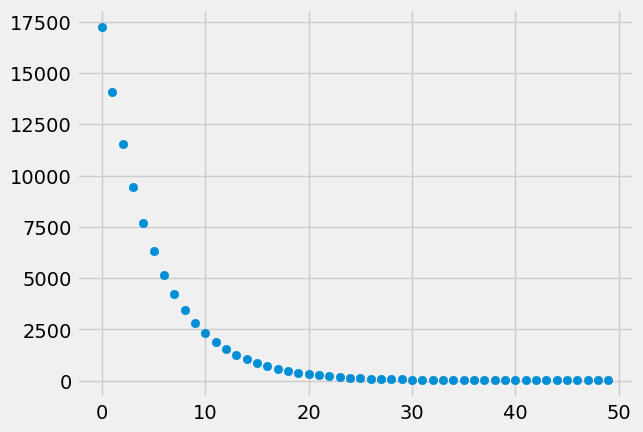

In [24]:
import torch.nn as nn # Neural Networks module

########################################################
# torch.nn models expect the features to be in columns #
#                        and samples to be in rows     #
########################################################

X = torch.tensor(galton.midparentHeight, 
                 dtype=torch.float32).view(-1,1)
Y = torch.tensor(galton.childHeight, 
                 dtype=torch.float32).view(-1,1)

n_samples, n_features = X.shape # 934 samples, single feature 


######################################################
# Define the model:                                  #
#    - Inherit from the basic Neural Networks class  #
#    - Define layers in the constructor              #
#    - Apply layers in the forward pass              # 
######################################################

class OurLR(nn.Module): # inherit from torch.nn.Module 

    def __init__(self, in_dim, out_dim): # constructor
        super().__init__() # parent constructor
        self.layer1 = nn.Linear(in_dim, out_dim) # one linear layer: 
                                                 # weights + bias
                                  # If there were more layers in the 
                                  # neural network they could be 
                                  # defined here
        
    def forward(self, x): 
        return self.layer1(x) 

###################################
# Create an instance of the model #   
###################################

in_dim, out_dim = n_features, n_features # One input, one output
model = OurLR(in_dim, out_dim)

                  ########
                  # bias #
                  ########
#                    | 
######  * weight     V        #######
# in # ---------->   + -----> # out #
######                        #######

parentsHeightTest = torch.tensor([74.00])
y_hat = model(parentsHeightTest)
print('Before training:')
print('    Parent height=%.2f'%parentsHeightTest)
print('    Predicted child height=%.2f\n\n'%y_hat)


######################################################
# Define learning rate, loss function, and optimizer #
######################################################
learning_rate = 1e-5 
n_epochs = 50 
loss_fun = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), 
                            lr=learning_rate) # parameters = weight

###################
# Train the model #
###################
losses = []
for epoch in range(n_epochs):

    y_hat = model(X)   # forward pass -> current prediction
    loss = loss_fun(Y, y_hat) # calculate loss
    loss.backward()      # backward pass -> calculate gradient
    losses.append(loss.item())
    
    optimizer.step() # update weight using stochastic gradient descent
    optimizer.zero_grad() # zero the gradient so it does not accumulate
    
plt.scatter(range(n_epochs), losses)

###################
# Test the model  #
###################
y_hat = model(parentsHeightTest)    
print('After training:')
print('    Parent height=%.2f'%parentsHeightTest)
print('    Predicted child height=%.2f\n\n'%y_hat)

for count, param in enumerate(model.parameters()):
    print('Model parameter %d: %.2f'%(count, param.item()))
    

### Building a simple linear neural network using pytorch

### Goal: to classify images of hand written digits to $10$ classes: $0, 1, 2, \dots , 9$

We'll use a subset of the MNIST datases:

$28 \times 28$ greyscale images of hand written digits.

<br/>

<br/>

Same pipeline as before:

#### Design the model

- Inherit from `torch.nn` + Input/output shapes:
  - Input $=$ image size $= 28 \times 28 = 784$
  - Output $=$ number of classes = $10$ <br/> Each output will be treated as a **'likelihood'** and the maximal one will determine the class.
- Forward pass: layers and [activation functions](https://pytorch.org/docs/stable/nn.html#non-linear-activations-weighted-sum-nonlinearity)

#### Choose the [loss function](https://pytorch.org/docs/stable/nn.html#loss-functions)

#### Choose the [optimizer](https://pytorch.org/docs/stable/optim.html)

#### Train the model (for each epoch, for each batch)

- Forward pass: calculate predictions and loss
- Backward pass: calculate gradients
- Optimizer step: update model parameters


In [25]:
import torch
import torch.nn as nn 
from torchvision.datasets import MNIST
import torchvision.transforms as transforms
from torch.utils.data import DataLoader




- Here, we will use the `MNIST` dataset from `torchvision.datasets`, which is already divided to training and testing sets.

- Any set of images can be loaded with the (generic) dataloader provided that it is organized appropriately:

[`torchvision.datasets.ImageFolder`](https://pytorch.org/vision/stable/generated/torchvision.datasets.ImageFolder.html) is a data loader for images arranged in subfolders by class. E.g.:

`root/dog/xxx.png` <br/>
`root/dog/xxy.png` <br/>
`root/dog/[...]/xxz.png` <br/>

<br/>

`root/cat/123.png` <br/>
`root/cat/nsdf3.png` <br/>
`root/cat/[...]/asd932_.png` <br/>


In [26]:
from torchvision import transforms
from torchvision.datasets import MNIST
from torch.utils.data import DataLoader

#########################
# Some hyper parameters # 
#########################

in_dim = 28*28 
out_dim = 10 # there are 10 distinct digits (classes)
hidden_dim = 300
n_epochs = 5 
batch_size = 100 
learning_rate = 1e-3 

# If unclear - draw the model 
# (although not every neuron in the hidden layer)


####################################################################
# Set up using torchvision.transforms for preprocessing each image #   
####################################################################

img_transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize([0.5], [0.5]) # instead of greyscale 
                                       # values between 0..255
])


################################################
#        Load data from a local folder         #
#   (some sources have naming discrepancies)   #
################################################

X_train = MNIST('data/MNIST', train=True, transform=img_transform, 
                download=True)
X_test = MNIST('data/MNIST', train=False, transform=img_transform)


#############################
# Specify the dataloader(s) # 
#############################

loader_train = DataLoader(dataset=X_train, batch_size=batch_size, 
                          shuffle=True)
loader_test = DataLoader(dataset=X_test, batch_size=batch_size, 
                         shuffle=False)


Failed to download (trying next):
HTTP Error 503: Service Unavailable



100%|██████████| 9912422/9912422 [00:02<00:00, 4203866.20it/s]


Extracting data/MNIST/MNIST/raw/train-images-idx3-ubyte.gz to data/MNIST/MNIST/raw

Failed to download (trying next):
HTTP Error 503: Service Unavailable



100%|██████████| 28881/28881 [00:00<00:00, 1227088.21it/s]


Extracting data/MNIST/MNIST/raw/train-labels-idx1-ubyte.gz to data/MNIST/MNIST/raw

Failed to download (trying next):
HTTP Error 503: Service Unavailable



100%|██████████| 1648877/1648877 [00:00<00:00, 2915595.39it/s]


Extracting data/MNIST/MNIST/raw/t10k-images-idx3-ubyte.gz to data/MNIST/MNIST/raw

Failed to download (trying next):
HTTP Error 503: Service Unavailable



100%|██████████| 4542/4542 [00:00<00:00, 1257709.70it/s]

Extracting data/MNIST/MNIST/raw/t10k-labels-idx1-ubyte.gz to data/MNIST/MNIST/raw



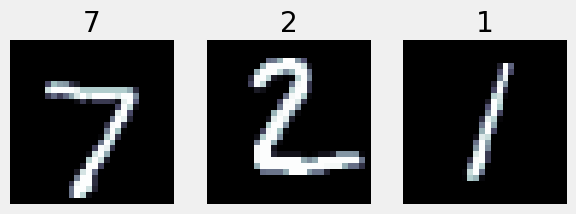

In [27]:
########################################
# Show a few example images and labels #
########################################

imgs, lbls = next(iter(loader_test)) # one batch
for i in range(3): 
    plt.subplot(1,3,i+1)
    plt.imshow(imgs[i][0], cmap='bone')
    plt.title(lbls[i].item())
    plt.axis('off')


#### A fully connected linear network with one hidden layer:


In [28]:
##########################################
# Specify the model class (model design) #
##########################################

class SimpleLinearNN(nn.Module): 
    
    def __init__(self, in_dim, hidden_dim, out_dim):
        super().__init__() # inherited constructor
        self.layer_1 = nn.Linear(in_dim, hidden_dim)
        self.relu = nn.ReLU() # Rectifier Linear Unit 
                              # activation function 
        self.layer_2 = nn.Linear(hidden_dim, out_dim)
        
    def forward(self, x): 
        output = self.layer_1(x)
        output = self.relu(output)
        output = self.layer_2(output)
        # No final activation function: 
        #    the loss function will expect 
        #    the unnormalized numbers as input
        return output
    
    
###################################
# Create an instance of the model #
###################################

model = SimpleLinearNN(in_dim, hidden_dim, out_dim)


######################################
# Define loss function and optimizer # 
######################################

loss_fun = nn.CrossEntropyLoss() # A loss function that expects 
                                 # unnormalized input  
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)


### Training the simple linear neural network using pytorch


In [22]:
%%time 

###################
# Train the model # 
###################

losses = [] 
for epoch in range(n_epochs): 
    for k, (imgs, lbls) in enumerate(loader_train): 
        
        # Forward pass and loss
        imgs = imgs.view(-1, 28*28) # each row will contain one 
                                    # 'flattened' image from batch
        network_outputs = model(imgs) # one prediction per image 
                                      # from the batch
        loss = loss_fun(network_outputs, lbls) # compare predictions 
                                               # and labels
        
        # Backward pass and parameter adjustment
        loss.backward()
        optimizer.step()
        optimizer.zero_grad() # so as not to accumulate grads 
                              # between batches
        
        # Indicate progress
        if k%200 == 0: 
            print('Epoch %d, batch %d: loss = %.3f'%\
                  (epoch, k, loss.item()))
        losses.append(loss)
        



Epoch 0, batch 0: loss = 2.373
Epoch 0, batch 200: loss = 0.264
Epoch 0, batch 400: loss = 0.280
Epoch 1, batch 0: loss = 0.215
Epoch 1, batch 200: loss = 0.136
Epoch 1, batch 400: loss = 0.056
Epoch 2, batch 0: loss = 0.254
Epoch 2, batch 200: loss = 0.057
Epoch 2, batch 400: loss = 0.185
Epoch 3, batch 0: loss = 0.109
Epoch 3, batch 200: loss = 0.127
Epoch 3, batch 400: loss = 0.138
Epoch 4, batch 0: loss = 0.034
Epoch 4, batch 200: loss = 0.093
Epoch 4, batch 400: loss = 0.038
CPU times: user 38.5 s, sys: 1min 49s, total: 2min 28s
Wall time: 10.9 s


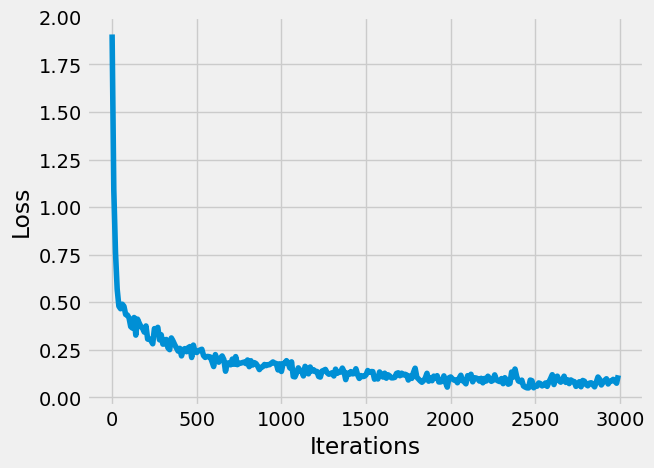

In [23]:
##########################
# Plot (smoothed) losses #
##########################

win = 10

losses_values = [x.detach().numpy() for x in losses] # remove the computational graph from each tensor
losses_values = np.convolve(losses_values, np.ones(win), 'valid') / win # rolling window average
iters = np.array(range(len(losses_values)))
losses_values = losses_values[::win]
iters = iters[::win] 

plt.figure()
plt.plot(iters, losses_values) 
plt.xlabel('Iterations')
plt.ylabel('Loss');



### Testing the simple linear neural network using pytorch

**Note (I):**
After training we do not need the gradient calculations to be performed so we can

- `.detach()` (creates a new copy of the tensor) or
- set `.requires_grad_(False)` (sets the flag in place) or
- use `with torch.no_grad():` (skips the calculations without copying or changing the tensor)

<br/>

**Note (II):**

When `dim` (dimension to maximize over) is specified in `torch.max()`, the function returns the max value and index:


In [24]:
random_tensor = torch.rand(1, 3)
print(random_tensor)
val, idx = torch.max(random_tensor, dim=1) # maximize over columns 
                                           # and (!) return indices
print('Max value = %.3f , Index of max = %d'%(val, idx))


tensor([[0.0475, 0.2900, 0.1858]])
Max value = 0.290 , Index of max = 1


In [25]:
##################
# Test the model # 
##################

accuracy = 0 
with torch.no_grad(): 
    for imgs, lbls in loader_test:
        imgs = imgs.view(-1, 28*28)
        network_outputs = model(imgs)
        _, y_hats = torch.max(network_outputs, dim=1) # pick class 
                                                      # with maxinal 
                                                      # likelihood
        accuracy += (y_hats == lbls).sum().item()

accuracy = accuracy / len(loader_test.dataset)    
mystr = ' (yay!)' if accuracy>=0.95 else '' 
print('Accuracy = %.3f'%accuracy, mystr)        

Accuracy = 0.970  (yay!)


### Building a simple convolutional neural network using pytorch

A few clarifications (see links for mpore details):

- [Convolutional layers](https://www.ibm.com/topics/convolutional-neural-networks#:~:text=The%20convolutional%20layer%20is%20the%20core%20building%20block%20of%20a,filter%2C%20and%20a%20feature%20map.) are a building block that make CNNs less sensitive to translation (where a feature is on a particular image) by implementing filters that can detect various features regardless of their exact position in the image.

  - A $3\times 3$ filter (kernel) size will be able to work on the image starting from the second pixel and ending at the pixel-before-last in every dimension. Therefore, the output image will be smaller by $2$ pixels in every dimension.

- Max pooling: [`torch.nn.MaxPool2d`](https://pytorch.org/docs/stable/generated/torch.nn.MaxPool2d.html) downsamples evey $2\times2$ square of pixels to one pixel equal to the maximal of the four. This is a simple (and common) way of reducing the number of parameters and computations in the network.
  - A $2\times 2$ max pooling filter will shrink every dimension by a factor of $2$.
- For the overall architecture to make sense, it is necessary to keep track of the data size after each operation. These sizes are noted in comments alongside the implementation of each layer/operation in the forward pass.

- The exact architecture implemented below is, by and large, arbitrary. Classifying hand written digits turns out to be not a very hard problem.


In [26]:
#########################
# Some hyper parameters # 
#########################

img_dim = 28 
out_dim = 10 # there are 10 distinct digits (classes)
n_epochs = 3 
batch_size = 100 
learning_rate = 1e-3 

################################################
#        Load data from a local folder         #
#   (some sources have naming discrepancies)   #
################################################

img_transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize([0.5], [0.5]), # instead of greyscale 
                                        # values between 0..255
    transforms.Resize((img_dim, img_dim)) 
])

X_train = MNIST('data/MNIST', train=True, transform=img_transform, 
                download=True)
X_test = MNIST('data/MNIST', train=False, transform=img_transform)


#############################
# Specify the dataloader(s) # 
#############################

loader_train = DataLoader(dataset=X_train, batch_size=batch_size, 
                          shuffle=True)
loader_test = DataLoader(dataset=X_test, batch_size=batch_size, 
                         shuffle=False)


##########################################
# Specify the model class (model design) #
##########################################

class SimpleConvolutionalNN(nn.Module): 
    
    def __init__(self):
        super().__init__() # inherited constructor
        self.convLayer_1 = nn.Conv2d(in_channels=1, out_channels=30, 
                                     kernel_size=3)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
        self.relu = nn.ReLU()
        self.convLayer_2 = nn.Conv2d(in_channels=30, out_channels=60, 
                                     kernel_size=3)
        self.convLayer_3 = nn.Conv2d(in_channels=60, out_channels=60, 
                                     kernel_size=3)
        self.LinLayer_4 = nn.Linear(540, 60)
        self.LinLayer_5 = nn.Linear(60, 10)
        
    def forward(self, x): 
        output = x                         # batch_size x 1 x 28 x 28
        output = self.convLayer_1(output)  # batch_size x 30 x 26 x 26
        output = self.relu(output)         # batch_size x 30 x 26 x 26
        output = self.pool(output)         # batch_size x 30 x 13 x 13
        output = self.convLayer_2(output)  # batch_size x 60 x 11 x 11 
        output = self.relu(output)         # batch_size x 30 x 11 x 11
        output = self.pool(output)         # batch_size x 30 x 5 x 5
        output = self.convLayer_3(output)  # batch_size x 60 x 3 x 3
        output = torch.flatten(output, 1)  # batch_size x 540
        output = self.LinLayer_4(output)   # batch_size x 60 
        output = self.relu(output)         # batch_size x 60
        output = self.LinLayer_5(output)   # batch_size x 10 
        # No final activation function: 
        #     the loss function will expect 
        #     the unnormalized numbers as input
        return output
      
###################################
# Create an instance of the model #
###################################

model = SimpleConvolutionalNN()


######################################
# Define loss function and optimizer # 
######################################

loss_fun = nn.CrossEntropyLoss() # A loss function that expects 
                                 # unnormalized input  
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)



Epoch 0, batch 0: loss = 2.304
Epoch 0, batch 200: loss = 0.122
Epoch 0, batch 400: loss = 0.177
Epoch 1, batch 0: loss = 0.089
Epoch 1, batch 200: loss = 0.009
Epoch 1, batch 400: loss = 0.015
Epoch 2, batch 0: loss = 0.016
Epoch 2, batch 200: loss = 0.034
Epoch 2, batch 400: loss = 0.248

CPU times: user 2min 50s, sys: 8min 10s, total: 11min
Wall time: 49.4 s


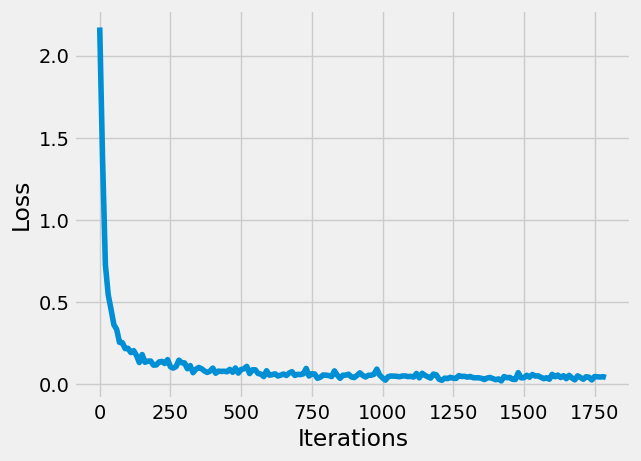

In [27]:
%%time 

###################
# Train the model # 
###################

losses = [] 
for epoch in range(n_epochs): 
    for k, (imgs, lbls) in enumerate(loader_train): 
        
        # Forward pass and loss
        network_outputs = model(imgs) # one prediction per image 
                                      # from the batch
        loss = loss_fun(network_outputs, lbls) # compare predictions 
                                               # and labels
        
        # Backward pass and parameter adjustment
        loss.backward()
        optimizer.step()
        optimizer.zero_grad() # so as not to accumulate grads 
                              # between batches
        
        # Indicate progress
        if k%200 == 0: 
            print('Epoch %d, batch %d: loss = %.3f'%\
                  (epoch, k, loss.item()))
        losses.append(loss)
print()
        
##########################
# Plot (smoothed) losses #
##########################

win = 10

losses_values = [x.detach().numpy() for x in losses] # remove the 
                                            # computational graph 
                                            # from each tensor
losses_values = np.convolve(losses_values, 
                            np.ones(win), 
                            'valid')/win # rolling window average

iters = np.array(range(len(losses_values)))
losses_values = losses_values[::win]
iters = iters[::win] 

plt.figure()
plt.plot(iters, losses_values) 
plt.xlabel('Iterations')
plt.ylabel('Loss');


### Testing the simple convolutional neural network using pytorch

(Same as before)


In [29]:
##################
# Test the model # 
##################

accuracy = 0 
with torch.no_grad(): 
    for imgs, lbls in loader_test:
        network_outputs = model(imgs)
        _, y_hats = torch.max(network_outputs, dim=1) # pick class 
                                                      # with maxinal 
                                                      # likelihood
        accuracy += (y_hats == lbls).sum().item()

accuracy = accuracy / len(loader_test.dataset)    
mystr = ' (yay!)' if accuracy>=0.95 else '' 
print('Accuracy = %.3f'%(accuracy), mystr)        

Accuracy = 0.988  (yay!)


### Summary

- **Design the model** (input, hidden layers, activation functions, output...)
- **Create instances** of the:
  - Model
  - Loss function
  - Optimizer
- **Train the model.** <br/> For each epoch: <br/> $ \hspace{8mm}$ For each sample or batch of samples: <br/> $ \hspace{16mm} \circ$ Forward pass (calculate predictions) <br/> $ \hspace{16mm} \circ$ Calculate loss <br/> $ \hspace{16mm} \circ$ Backward pass (calculate gradients) <br/> $ \hspace{16mm} \circ$ Optimizer step (update weights) <br/> $ \hspace{16mm} \circ$ (zero the gradients)
- **Test/evaluate the model** using a testing dataset that was set aside
